In [1]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [2]:
data = pd.read_csv('games.csv')

data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

data = data[data['gameDuration']>=300]

data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills','t2_riftHeraldKills'
       ]]

In [23]:
X = data.drop(['winner'], axis=1)
Y = data['winner'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

In [24]:
score = 0
precision = []

for n in range(1,50):
    rnf = RandomForestClassifier(n_estimators=n, random_state=rs)
    rnf.fit(X_train, y_train)
    prediction = rnf.predict(X_test)
    accuracy_test = accuracy_score(y_test, prediction.round())
    if (score<accuracy_test):
        y_pred = prediction
        score = accuracy_test
        pos = n
    precision.insert(n, accuracy_test)

print("precision: {0: .9f}".format(score))
print("n_estimators:"+format(pos))

precision:  0.979620241
n_estimators:31


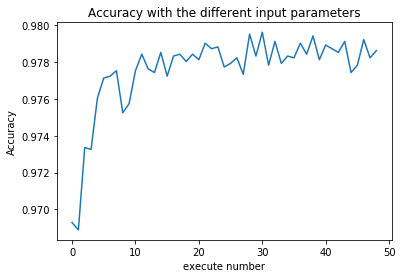

In [25]:
from sklearn.model_selection import GridSearchCV

plt.title('Accuracy with the different input parameters')
plt.ylabel('Accuracy')
plt.xlabel('execute number')
plt.plot(precision)
plt.savefig("RF-1",dpi=240,bbox_inches='tight')

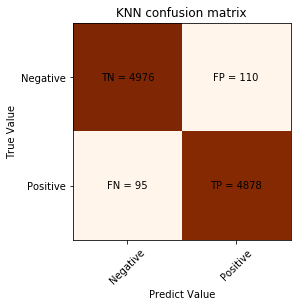

In [26]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('KNN confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


plt.savefig("RF_con",dpi=240, bbox_inches='tight')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.98127   0.97837   0.97982      5086
           2    0.97795   0.98090   0.97942      4973

    accuracy                        0.97962     10059
   macro avg    0.97961   0.97963   0.97962     10059
weighted avg    0.97963   0.97962   0.97962     10059



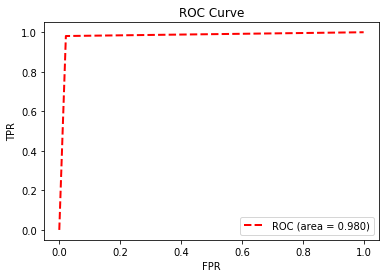

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thersholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', color='red',label='ROC (area = {0:.3f})'.format(roc_auc), lw=2)

    
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('RF-roc',dpi=240,bbox_inches='tight')
plt.show()